# Predictor de Diabetes

El objetivo de este trabajo es crear un modelo de redes nueronales para predecir, en base a una serie de datos genéricos, si un paciente presenta diabetes o no.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import RandomOverSampler

## Sobre el dataset

El dataset utilizado fue descargado del repositorio de datasets de Kaggle, el cual se encuentra de manera libre para su descarga.

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

El dataset original consta de 100,000 registros. 
Algunos de ellos venían sin información en la variable categórica "smoking_history", en uno de modelos fueron descartados quedando alrededor de 60,000 datos y en el otro fueron transformados.

La variable "diabetes" es una columna de valores binarios que indican si la persona tiene diabetes o no. Esta variable se tomó como nuestra variable dependiente de este modelo.

In [4]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

<Axes: xlabel='smoking_history'>

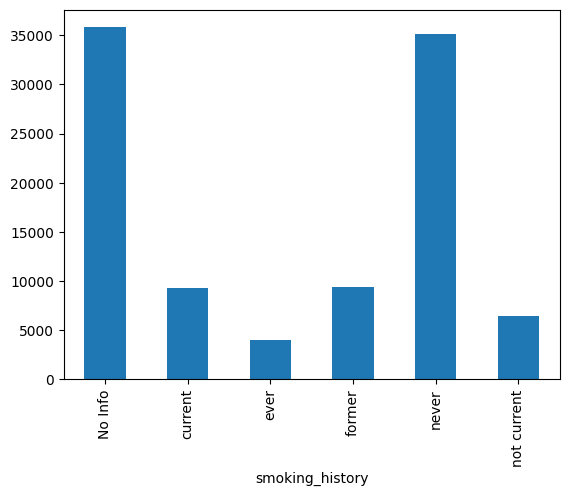

In [5]:
df_bar = df.groupby("smoking_history").smoking_history.count()
df_bar.plot(kind = "bar")

- df_nosmk: No incluye los renglones sin información en la columna de smoking_history:
- df_smk: Sí los incluye, sustituyendolos por "never", contiene 64,184 renglones.

In [16]:
df_smk = df.replace("No Info", "never")
df_nosmk = df[df["smoking_history"] != "No Info"].reset_index(drop = True)

Usando dummy variables para codificar género e historial fumador.

In [17]:
df_smk_dummy_gen = pd.get_dummies(df_smk["gender"])
df_smk_dummy_smk = pd.get_dummies(df_smk["smoking_history"])
df_smk = pd.concat([df_smk, df_smk_dummy_gen, df_smk_dummy_smk], axis = "columns")
df_smk = df_smk.drop(["gender", "smoking_history"], axis = 1)
df_smk

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,0,0,0,1,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,0,0,0,1,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,1,0


In [18]:
df_nosmk_dummy_gen = pd.get_dummies(df_nosmk["gender"])
df_nosmk_dummy_smk = pd.get_dummies(df_nosmk["smoking_history"])
df_nosmk = pd.concat([df_nosmk, df_nosmk_dummy_gen, df_nosmk_dummy_smk], axis = "columns")
df_nosmk = df_nosmk.drop(["gender", "smoking_history"], axis = 1)
df_nosmk

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
2,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
3,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0
4,20.0,0,0,27.32,6.6,85,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64179,26.0,0,0,34.34,6.5,160,0,1,0,0,0,0,0,1,0
64180,40.0,0,0,40.69,3.5,155,0,1,0,0,0,0,0,1,0
64181,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,1,0,0
64182,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,1,0


## Preprocesamiento

Los datos 

In [20]:
y_smk = df_smk["diabetes"]
X_smk = df_smk.drop(["diabetes"], axis = "columns")
X_smk_train, X_smk_test, y_smk_train, y_smk_test = train_test_split(X_smk, y_smk, test_size = 0.33)

La base de datos presenta un desbalance en la clase "diabetes": las personas que no tienen diabetes exceden más de 10 a las que presentan diabetes. Esto podría alterar el modelo de aprendizaje a favor de negativos, por lo que se ha considerado hacer un preprocesamiento de datos de remuestreado.


diabetes
0    91500
1     8500
Name: diabetes, dtype: int64

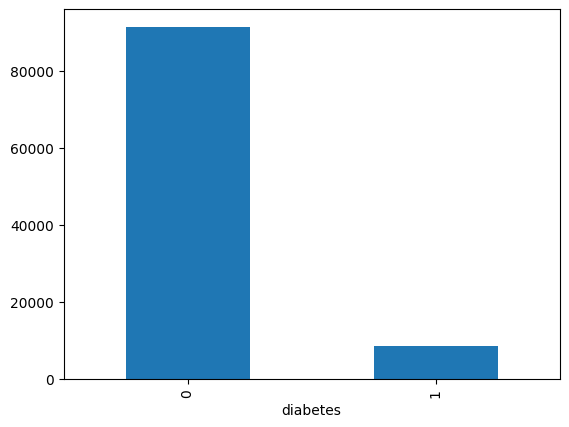

In [21]:
df_diabetes = df.groupby("diabetes").diabetes.count()
df_diabetes.plot(kind="bar")
df_diabetes

*RandomOverSample* hare un remuestreo aletorio con reemplazo para simular un mejor balance en las clases.

In [22]:
ros_smk = RandomOverSampler()
X_smk_train_ovs, y_smk_train_ovs = ros_smk.fit_resample(X_smk_train, y_smk_train)

In [25]:
y_nosmk = df_nosmk["diabetes"]
X_nosmk = df_nosmk.drop(["diabetes"], axis = "columns")
ros_nosmk = RandomOverSampler()
X_nosmk_train, X_nosmk_test, y_nosmk_train, y_nosmk_test = train_test_split(X_nosmk, y_nosmk, test_size = 0.33)
X_nosmk_train_ovs, y_nosmk_train_ovs = ros_nosmk.fit_resample(X_nosmk_train, y_nosmk_train)

En esta gráfica se puede ver como la función RandomOverSampler hace un balance de las muestras hasta tener la misma cantidad de datos en las clases de Diabetes y No Diabetes.


<Axes: xlabel='diabetes'>

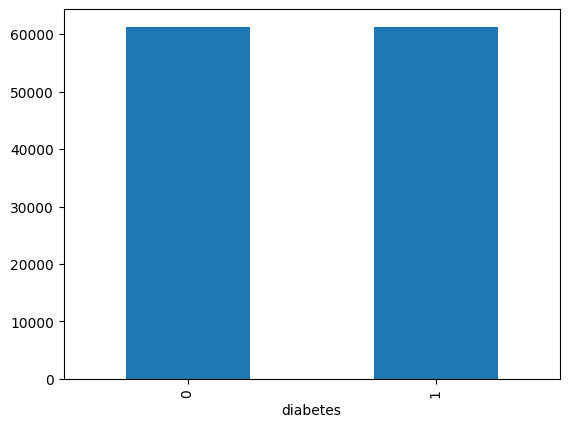

In [26]:
dataX = X_smk_train_ovs.copy()
dataX["diabetes"] = y_smk_train_ovs
dataX_graph = dataX.groupby("diabetes").diabetes.count()
dataX_graph.plot(kind = "bar")

## Entrenamiento 

Primeramente se realizó la partición de los datos para obtener los conjuntos de entrenamiento y de validación.

Se utilizó MLPClassifier con los siguientes parámetros:
- Función de activación: relu
- Solver: lbfgs (un optimizador en la familia de los métodos quasi-Newton)
- Número de capas ocultas: 3 capas de 32, 8 y 8 neuronas respectivamente.
- Número de iteraciones: 3500

In [ ]:
model_smk = MLPClassifier(solver = "lbfgs", alpha = 1e-5, hidden_layer_sizes = (32, 8, 8), max_iter = 3500)
model_smk.fit(X_smk_train, y_smk_train)

In [ ]:
model_nosmk = MLPClassifier(solver = "lbfgs", alpha = 1e-5, hidden_layer_sizes = (32, 8, 8), max_iter = 3500)
model_nosmk.fit(X_nosmk_train, y_nosmk_train)

In [29]:
ans_smk = (model_smk.predict_proba(X_smk_test)[:,1] >= 0.3).astype(bool)

In [30]:
ans_nosmk = (model_nosmk.predict_proba(X_nosmk_test)[:,1] >= 0.3).astype(bool)

## Validación 

Para la validación se utilizó un "Clasiffication report" el cual nos arroja un reporte que incluye las métricas más importantes, como el score.

Se implementó una matriz de confusión para visualizar los resultados positivos, negativos, falsos positivos y falsos negativos de las salidas de la red neuronal.

In [31]:
print("Precisión del modelo smk:", accuracy_score(y_smk_test, ans_smk))
print("Precisión del modelo nosmk:", accuracy_score(y_nosmk_test, ans_nosmk))
print("Puntuación de Jaccard del modelo smk:", jaccard_score(y_smk_test, ans_smk))
print("Puntuación de Jaccard del modelo nosmk:", jaccard_score(y_nosmk_test, ans_nosmk))
conf_matrix_smk = confusion_matrix(y_smk_test, ans_smk)
conf_matrix_nosmk = confusion_matrix(y_nosmk_test, ans_nosmk)
print(classification_report(y_smk_test,ans_smk))
print(classification_report(y_nosmk_test,ans_nosmk))

Precisión del modelo smk: 0.9331212121212121
Precisión del modelo nosmk: 0.9042538123790189
Puntuación de Jaccard del modelo smk: 0.3831749580771381
Puntuación de Jaccard del modelo nosmk: 0.34177215189873417
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30227
           1       0.63      0.49      0.55      2773

    accuracy                           0.93     33000
   macro avg       0.79      0.73      0.76     33000
weighted avg       0.93      0.93      0.93     33000

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     18841
           1       0.59      0.45      0.51      2340

    accuracy                           0.90     21181
   macro avg       0.76      0.71      0.73     21181
weighted avg       0.90      0.90      0.90     21181



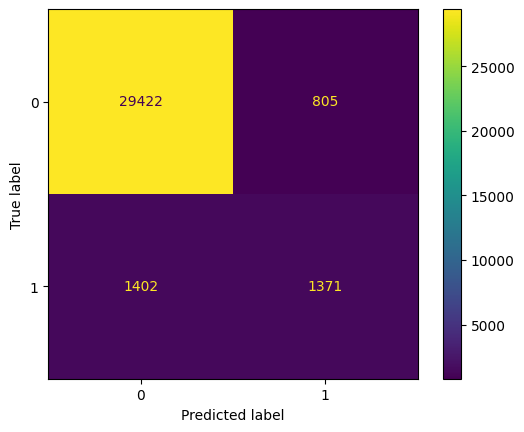

In [32]:
Conf_Matrix_SMK = ConfusionMatrixDisplay(conf_matrix_smk)
Conf_Matrix_SMK.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

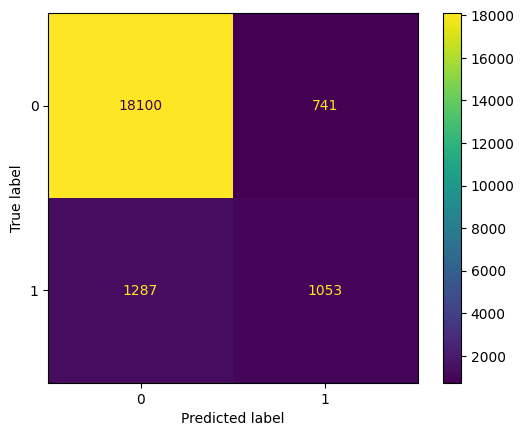

In [33]:
Conf_Matrix_NOSMK = ConfusionMatrixDisplay(conf_matrix_nosmk)
Conf_Matrix_NOSMK.plot()
plt.show

## Conclusión

En base los resultados que se obtuvieron en la validación, se puede ver, que la precisión del modelo fueron afectados por el desbalance en el número de clasificación, por lo que se presentó una técnica para disminuir este desbalance.

Los resultados del modelo presentan una buena predicción en pacientes que no presentan diabetes, pero un pobre desempeño en el caso de pacientes con diabetes. 

Se considera que para mejorar los resultados del modelo se pueden considerar las siguientes acciones:

  - Aplicar diferentes Optimizadores como lo es Adams, el gradiente estocástico, etc.
  - Estandarización de datos.
  - Ajustar parámetros de aprendizaje del modelo como lo es la topología de la red, probar diferentes funciones de activación, alpha's etc. 




## Referencias:

- Dataset Kaggle
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

- Documentación sklearn
  - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
  - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
  